In [2]:
!pip install matplotlib==3.7.2 deap==1.3.3

# Import necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from IPython import get_ipython
from IPython.display import display

In [10]:
num_locations = 10  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [4]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0,) )
creator.create("Individual",list, fitness=creator.FitnessMin )

In [5]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)#finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)#finish defining how to build an population)

In [31]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

SyntaxError: incomplete input (<ipython-input-31-1dcc81bfa9a8>, line 9)

In [11]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluate function


# Genetic Operators
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [12]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(8, 8))
    plt.title(title)

    # Plot depot
    plt.scatter(depot[0], depot[1], marker='s', color='black', s=100, label='Depot')

    # Plot locations and routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        route_x = [loc[0] for loc in vehicle_route]
        route_y = [loc[1] for loc in vehicle_route]
        plt.plot(route_x, route_y, marker='o', label=f'Vehicle {i+1}')

    plt.legend()
    plt.show()

gen	nevals	avg    	min     
0  	300   	330.318	0.223078
1  	220   	313.903	0.223078
2  	240   	306.488	2.517   
3  	229   	302.934	4.63138 
4  	228   	297.074	3.21647 
5  	218   	292.897	0.935778
6  	220   	291.616	2.97592 
7  	232   	278.88 	1.94665 
8  	223   	274.414	1.58615 
9  	219   	264.54 	2.63143 
10 	251   	262.462	3.31159 
11 	221   	253.241	2.96051 
12 	221   	247.458	3.28746 
13 	212   	238.274	1.80828 
14 	216   	237.249	4.23234 
15 	222   	236.017	4.23234 
16 	229   	231.405	1.80828 
17 	230   	229.672	1.50825 
18 	228   	222.169	1.80828 
19 	244   	214.846	1.80828 
20 	223   	212.016	6.56442 
21 	222   	214.147	5.15219 
22 	223   	211.901	3.53264 
23 	218   	212.075	5.15219 
24 	240   	212.402	6.56442 
25 	227   	212.593	5.15219 
26 	235   	211.924	12.2627 
27 	235   	213.461	5.15219 
28 	235   	213.45 	6.56442 
29 	240   	214.653	5.15219 
30 	235   	213.108	5.15219 
31 	232   	211.665	6.56442 
32 	229   	212.089	5.15219 
33 	243   	213.812	13.8624 
34 	214   	213.054	5

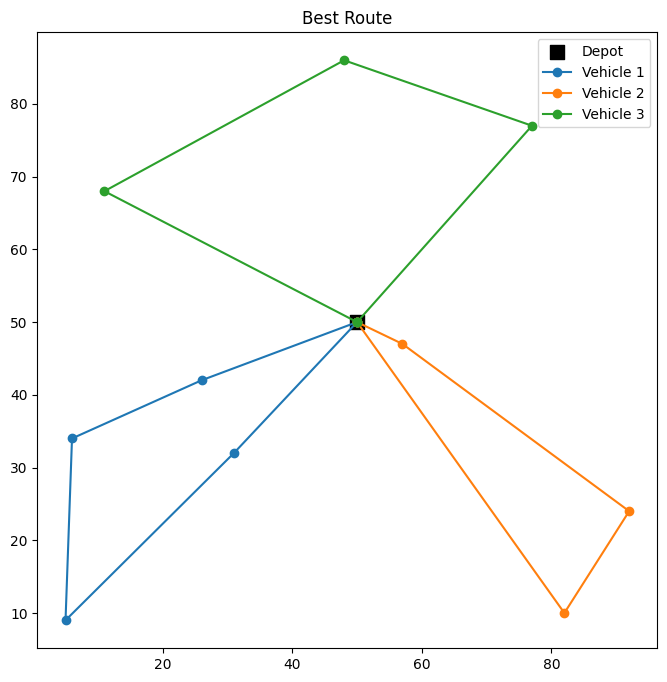

In [13]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)  # Run the genetic algorithm

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()  # Call the main function
# Print the results
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Best fitness:", best_individual.fitness.values)

    # Visualize the best route
    plot_routes(best_individual, title="Best Route")
